In [1]:
#impport statements

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
#dataloading 
data = pd.read_csv("/kaggle/input/dataset/Steel_industry.csv")

In [3]:
data.shape
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date_Time                             35041 non-null  object 
 1   Usage_kWh                             35041 non-null  float64
 2   Lagging_Current_Reactive.Power_kVarh  35041 non-null  float64
 3   Leading_Current_Reactive_Power_kVarh  35041 non-null  float64
 4   CO2(tCO2)                             35041 non-null  float64
 5   Lagging_Current_Power_Factor          35041 non-null  float64
 6   Leading_Current_Power_Factor          35041 non-null  float64
 7   NSM                                   35041 non-null  int64  
 8   WeekStatus                            35041 non-null  object 
 9   Day_Of_Week                           35041 non-null  object 
 10  Load_Type                             35041 non-null  object 
dtypes: float64(6), 

,Usage_kWh,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,CO2(tCO2),Lagging_Current_Power_Factor,Leading_Current_Power_Factor,NSM
count,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000
mean,27.386229,13.035012,3.871412,0.011524,80.578610,84.366038,42750.834736
std,33.444133,16.305916,7.424863,0.016151,18.921337,30.458030,24940.667915
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.200000,2.300000,0.000000,0.000000,63.320000,99.700000,21600.000000
50%,4.570000,5.000000,0.000000,0.000000,87.960000,100.000000,43200.000000
75%,51.230000,22.640000,2.090000,0.020000,99.030000,100.000000,64800.000000
max,157.180000,96.910000,27.760000,0.070000,100.000000,100.000000,85500.000000


In [4]:
cols = data.columns.tolist()
print(cols)
data.isnull().sum()
#no null values or missing data

['Date_Time', 'Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'CO2(tCO2)', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'NSM', 'WeekStatus', 'Day_Of_Week', 'Load_Type']


Date_Time                               0
Usage_kWh                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
CO2(tCO2)                               0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
NSM                                     0
WeekStatus                              0
Day_Of_Week                             0
Load_Type                               0
dtype: int64

In [5]:
data[['date', 'time']] = data['Date_Time'].str.split(' ', expand=True)

# Extract separate features
data['Date_Time'] = pd.to_datetime(data['Date_Time'], format='%d-%m-%Y %H:%M')
data['Date'] = data['Date_Time'].dt.date
data['Year'] = data['Date_Time'].dt.year
data['Month'] = data['Date_Time'].dt.month

In [6]:
#removing cols
columns_to_drop = ['Date_Time', 'date']
data = data.drop(columns_to_drop, axis=1)


In [7]:
def rearrange_columns(df, new_order):
    return df[new_order]

new_order = ['Date','Year','Month','time','WeekStatus','Day_Of_Week','NSM', 'Load_Type', 'Lagging_Current_Reactive.Power_kVarh', 
             'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor', 
             'Leading_Current_Power_Factor','CO2(tCO2)','Usage_kWh']

data = rearrange_columns(data, new_order)
#data.head(10)

In [8]:
load_uni = data['Load_Type'].unique()
week_uni = data['WeekStatus'].unique()
day_uni = data['Day_Of_Week'].unique()

unique_val = [load_uni, week_uni, day_uni]
print(unique_val)

[array(['Light_Load', 'Medium_Load', 'Maximum_Load'], dtype=object), array(['Weekday', 'Weekend'], dtype=object), array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)]


In [9]:
#converting the label to the numerical
data['WeekStatus'] = data['WeekStatus'].replace({'Weekday': 1, 'Weekend': 0}).infer_objects()
data['Load_Type'] = data['Load_Type'].replace({'Light_Load': 0, 'Medium_Load': 1, 'Maximum_Load':2}).infer_objects()
data.head()


<ipython-input-9-d9232860875c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['WeekStatus'] = data['WeekStatus'].replace({'Weekday': 1, 'Weekend': 0}).infer_objects()
<ipython-input-9-d9232860875c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['Load_Type'] = data['Load_Type'].replace({'Light_Load': 0, 'Medium_Load': 1, 'Maximum_Load':2}).infer_objects()


,Date,Year,Month,time,WeekStatus,Day_Of_Week,NSM,Load_Type,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,CO2(tCO2),Usage_kWh
0,2018-01-01,2018,1,00:15,1,Monday,900,0,2.95,0.0,73.21,100.0,0.0,3.17
1,2018-01-01,2018,1,00:30,1,Monday,1800,0,4.46,0.0,66.77,100.0,0.0,4.00
2,2018-01-01,2018,1,00:45,1,Monday,2700,0,3.28,0.0,70.28,100.0,0.0,3.24
3,2018-01-01,2018,1,01:00,1,Monday,3600,0,3.56,0.0,68.09,100.0,0.0,3.31
4,2018-01-01,2018,1,01:15,1,Monday,4500,0,4.50,0.0,64.72,100.0,0.0,3.82


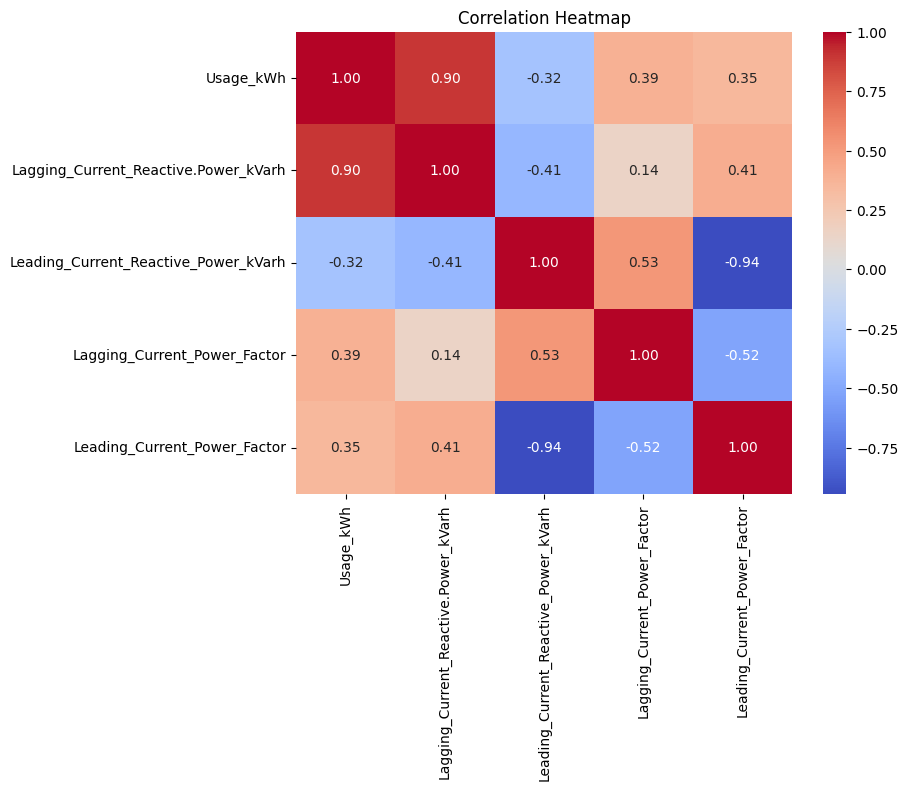

In [10]:
correlation_matrix1 = data[['Usage_kWh', 
                           'Lagging_Current_Reactive.Power_kVarh', 
                           'Leading_Current_Reactive_Power_kVarh', 
                           'Lagging_Current_Power_Factor',
                          'Leading_Current_Power_Factor']].corr()
(correlation_matrix1)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix1, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [11]:
data.to_csv("cleaned_data.csv", index=False)  

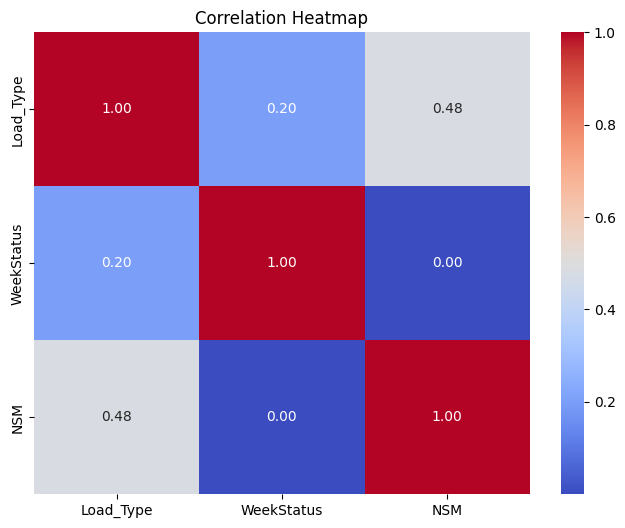

In [12]:

correlation_matrix2 = data[["Load_Type","WeekStatus","NSM"]].corr()
(correlation_matrix2)
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [13]:
cols = data.columns.tolist()
print(cols)
data.shape
data.info()
data.describe()

['Date', 'Year', 'Month', 'time', 'WeekStatus', 'Day_Of_Week', 'NSM', 'Load_Type', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'CO2(tCO2)', 'Usage_kWh']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35041 entries, 0 to 35040
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Date                                  35041 non-null  object 
 1   Year                                  35041 non-null  int32  
 2   Month                                 35041 non-null  int32  
 3   time                                  35041 non-null  object 
 4   WeekStatus                            35041 non-null  int64  
 5   Day_Of_Week                           35041 non-null  object 
 6   NSM                                   35041 non-null  int64  
 7   Load_Type                     

,Year,Month,WeekStatus,NSM,Load_Type,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,CO2(tCO2),Usage_kWh
count,35041.0,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000,35041.000000
mean,2018.0,6.526184,0.715077,42750.834736,0.691761,13.035012,3.871412,80.578610,84.366038,0.011524,27.386229
std,0.0,3.447975,0.451384,24940.667915,0.792655,16.305916,7.424863,18.921337,30.458030,0.016151,33.444133
min,2018.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.0,4.000000,0.000000,21600.000000,0.000000,2.300000,0.000000,63.320000,99.700000,0.000000,3.200000
50%,2018.0,7.000000,1.000000,43200.000000,0.000000,5.000000,0.000000,87.960000,100.000000,0.000000,4.570000
75%,2018.0,10.000000,1.000000,64800.000000,1.000000,22.640000,2.090000,99.030000,100.000000,0.020000,51.230000
max,2018.0,12.000000,1.000000,85500.000000,2.000000,96.910000,27.760000,100.000000,100.000000,0.070000,157.180000


In [14]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import mplcursors 


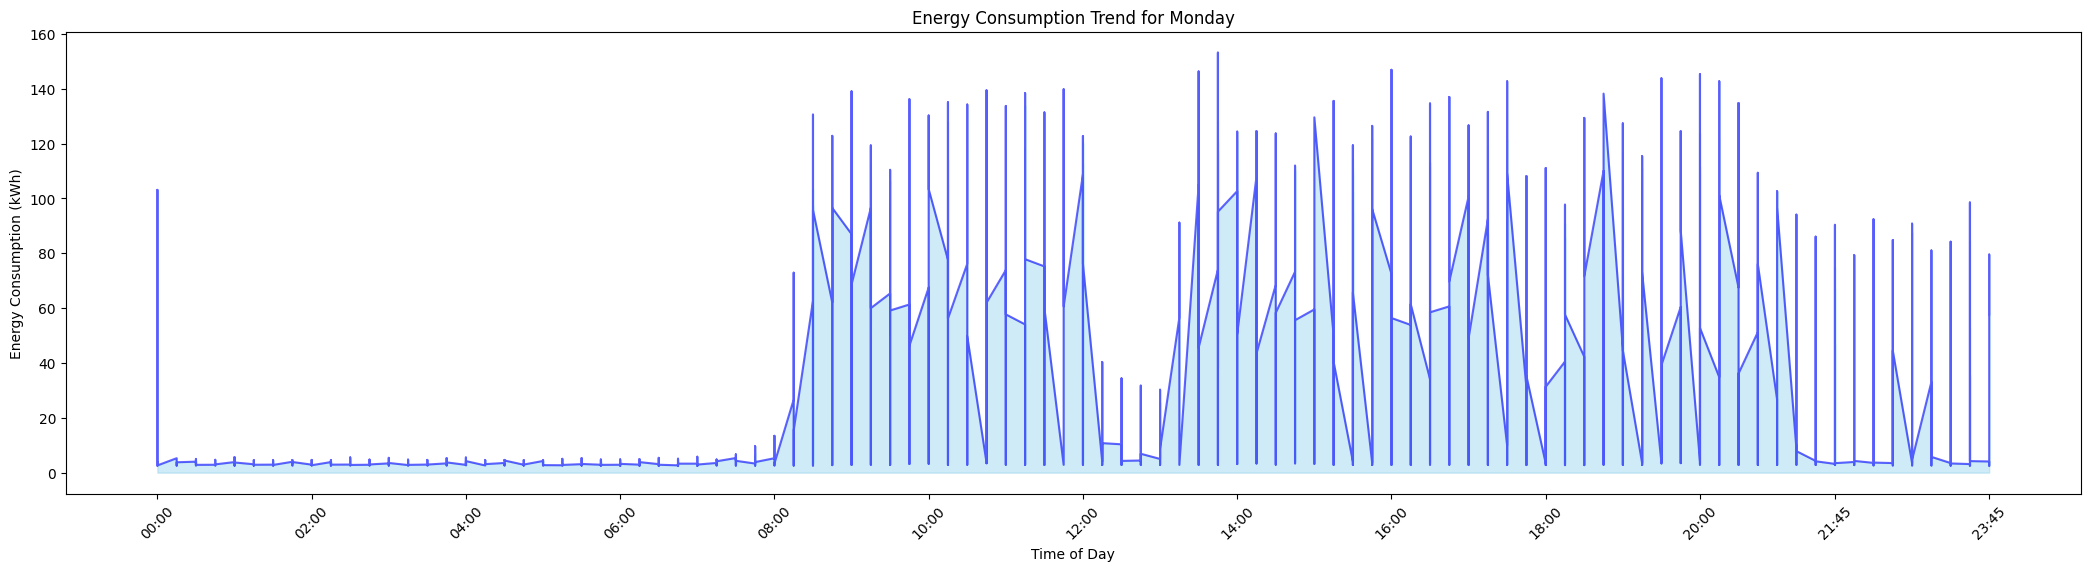

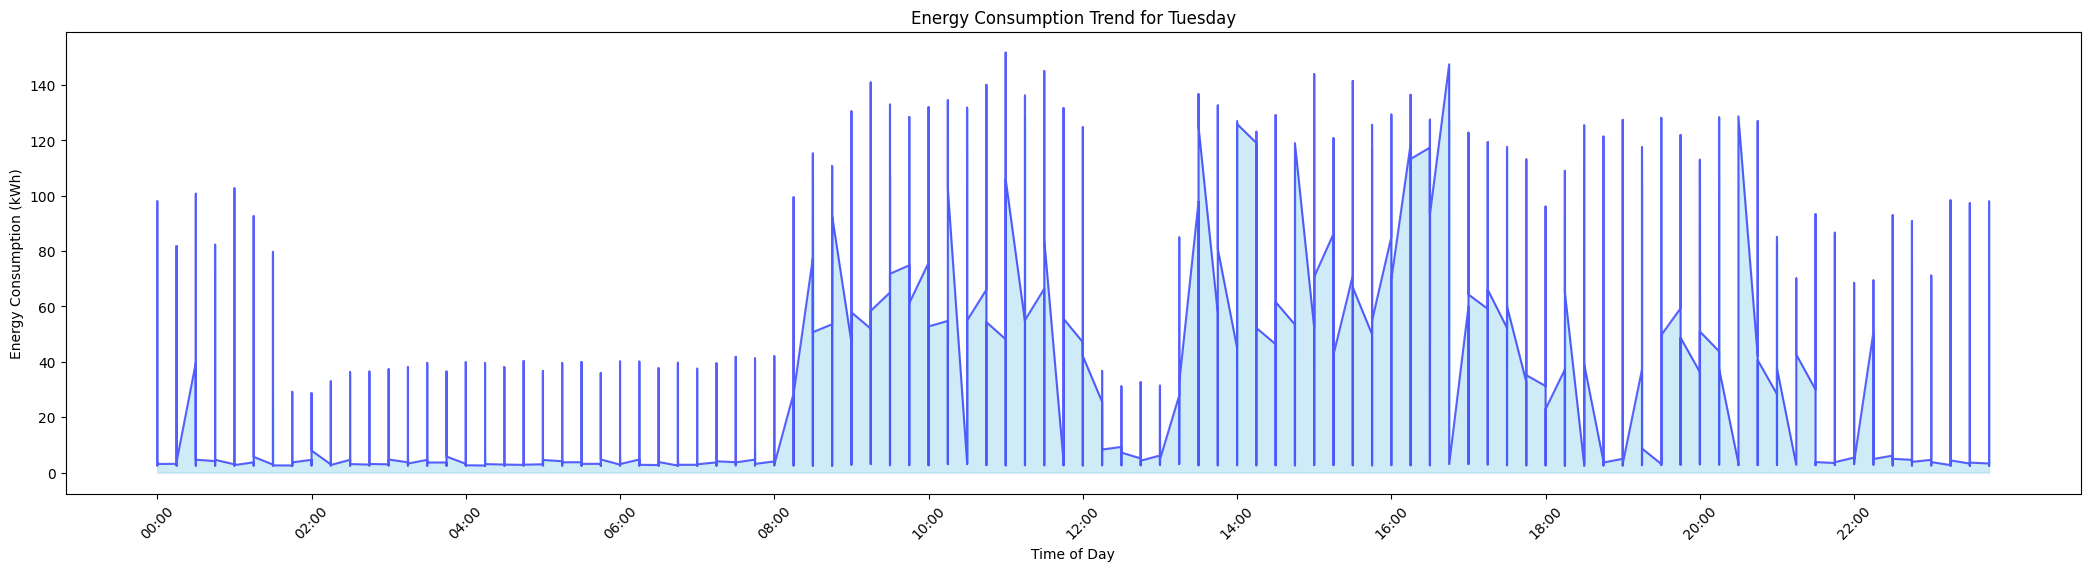

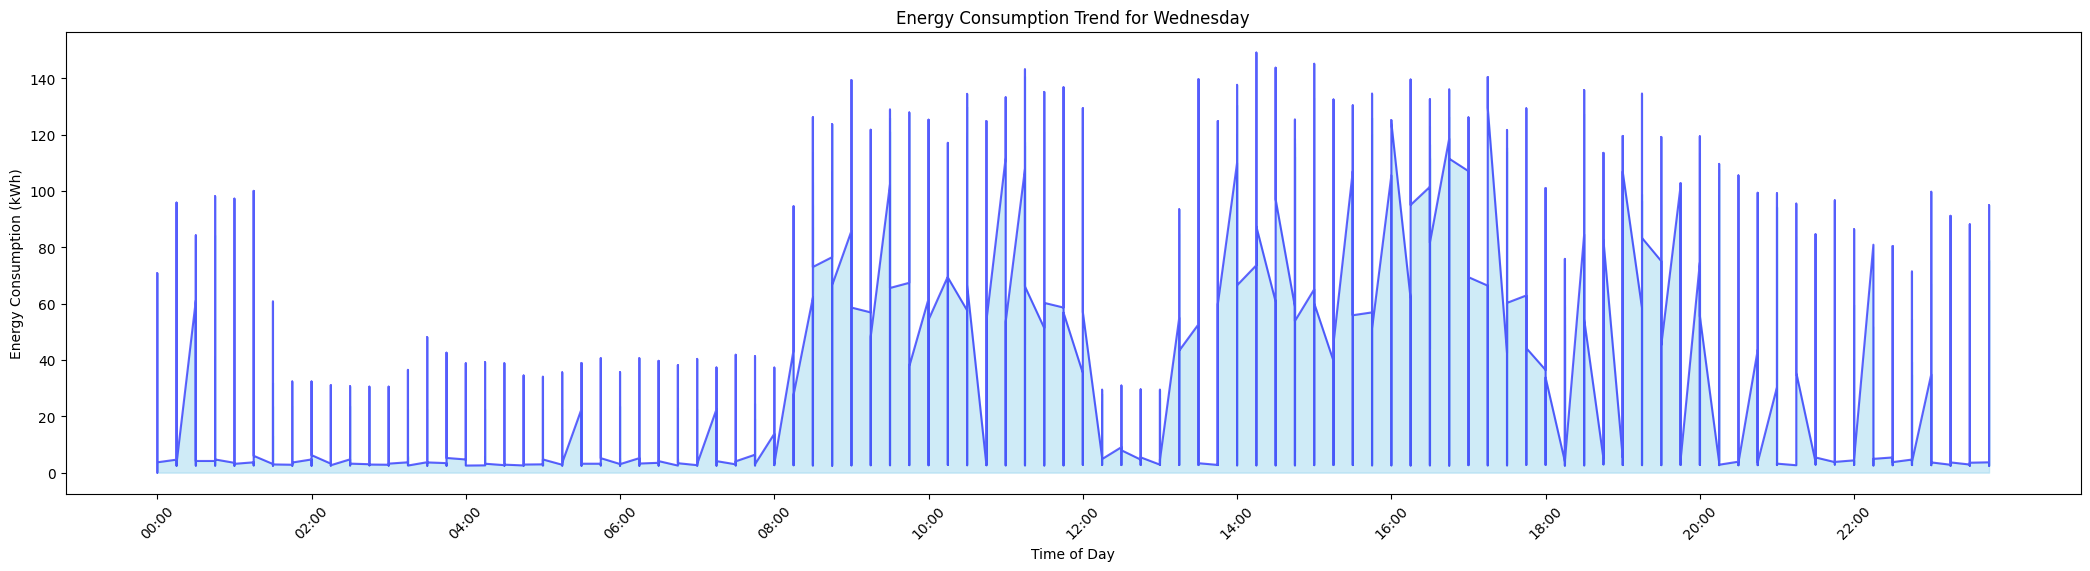

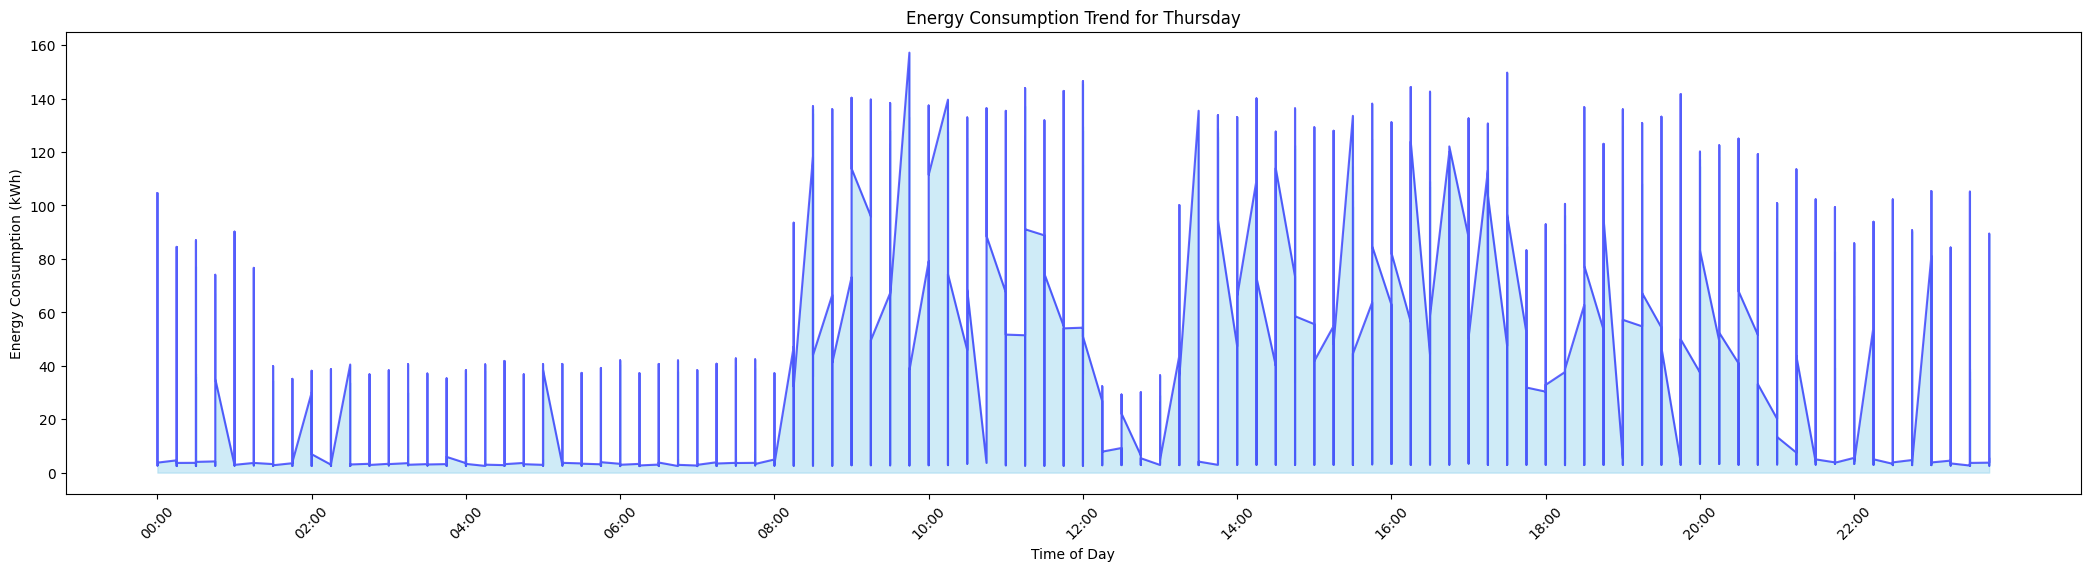

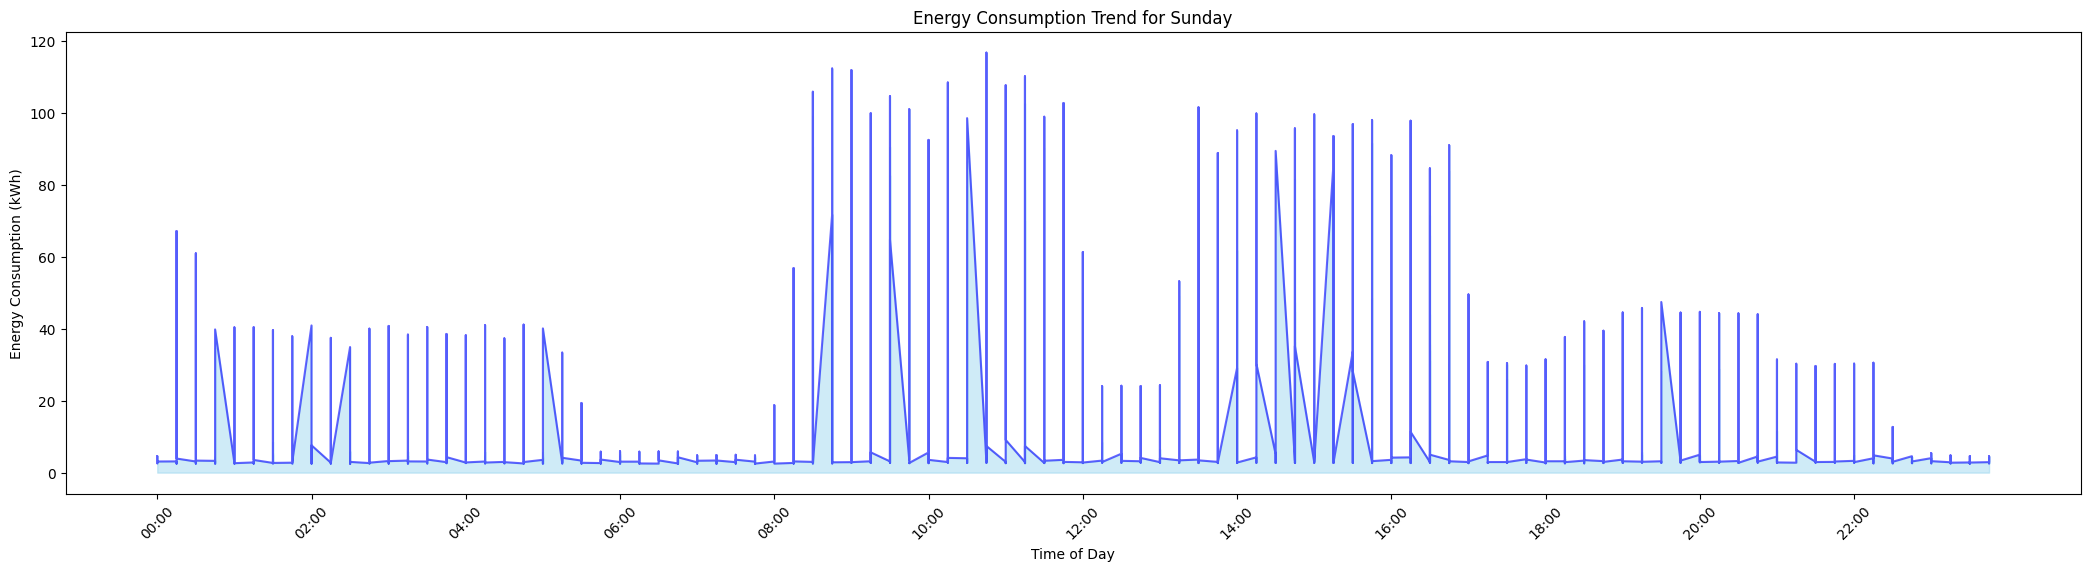

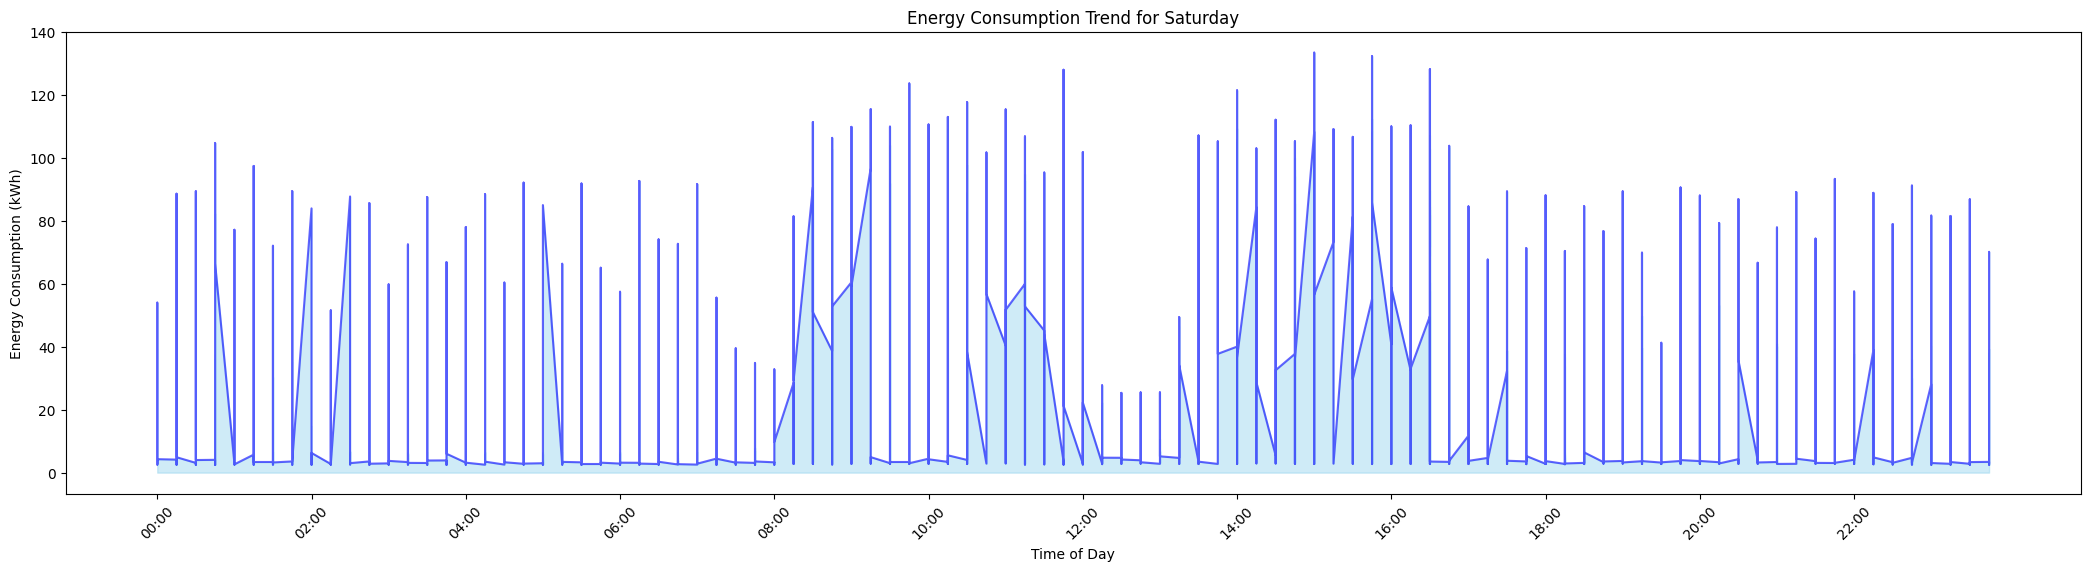

In [15]:
def plot_energy_trend_for_day(day_name):
    # Filter data based on the selected day
    selected_day_data = data[data['Day_Of_Week'] == day_name]
    
    # Sort by NSM (seconds from midnight)
    selected_day_data = selected_day_data.sort_values(by='NSM')
    
    # Plotting the Area Graph
    plt.figure(figsize=(26, 6))
    plt.fill_between(selected_day_data['NSM'], selected_day_data['Usage_kWh'], color='skyblue', alpha=0.4)
    plt.plot(selected_day_data['NSM'], selected_day_data['Usage_kWh'], color='b', alpha=0.6)
    
    # Convert NSM to a readable time format (hours:minutes)
    selected_day_data['Time'] = pd.to_datetime(selected_day_data['NSM'], unit='s').dt.strftime('%H:%M')

    # Set axis labels and title
    plt.title(f'Energy Consumption Trend for {day_name.capitalize()}')
    plt.xlabel('Time of Day')
    plt.ylabel('Energy Consumption (kWh)')
    
    # Set x-axis labels to time
    plt.xticks(ticks=selected_day_data['NSM'][::(len(selected_day_data)//12)],  # Fewer ticks for better visibility
               labels=selected_day_data['Time'][::(len(selected_day_data)//12)], rotation=45)
    
    plt.grid(False)
    #plt.tight_layout()
    plt.show()

# Example of how to use the function
plot_energy_trend_for_day("Monday")
plot_energy_trend_for_day("Tuesday")
plot_energy_trend_for_day("Wednesday")
plot_energy_trend_for_day("Thursday")
plot_energy_trend_for_day("Sunday")
plot_energy_trend_for_day("Saturday")


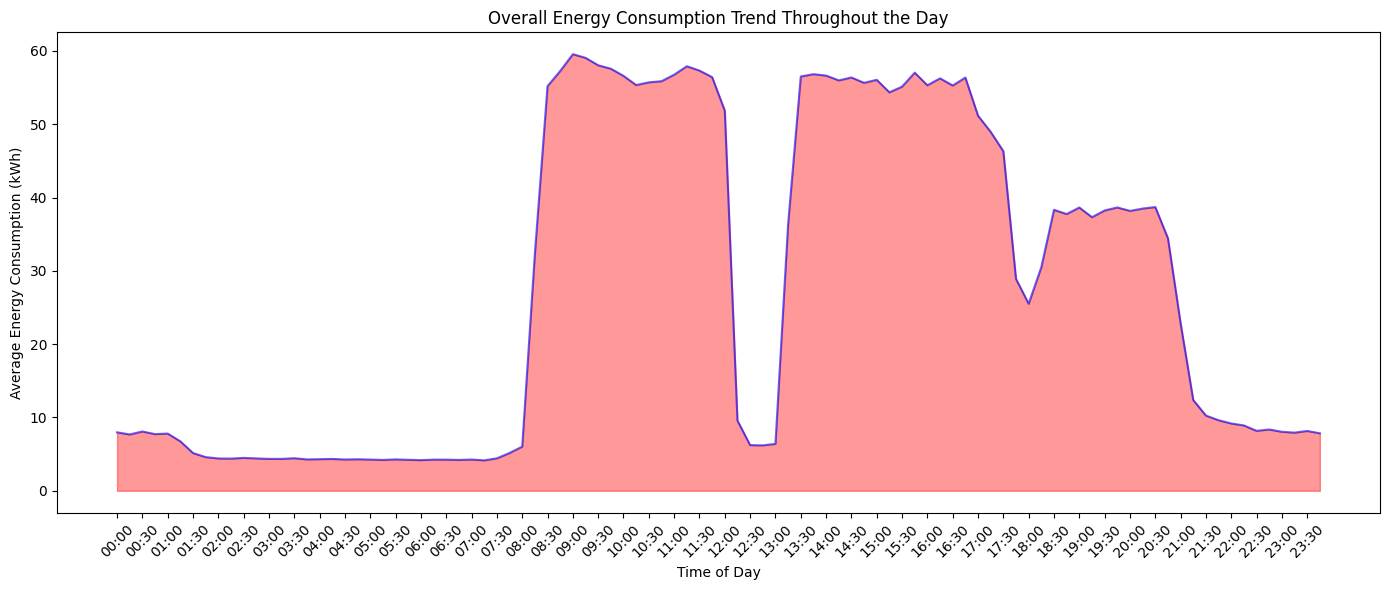

In [16]:
def plot_overall_energy_trend():
    # Aggregate energy usage by NSM (sum or mean can be used)
    overall_data = data.groupby('NSM', as_index=False)['Usage_kWh'].mean()  # Use .sum() for total consumption

    # Convert NSM to time format (hh:mm)
    overall_data['Time'] = pd.to_datetime(overall_data['NSM'], unit='s').dt.strftime('%H:%M')

    # Plotting the Area Graph
    plt.figure(figsize=(14, 6))  # Wider graph for better visibility
    plt.fill_between(overall_data['NSM'], overall_data['Usage_kWh'], color='red', alpha=0.4)
    plt.plot(overall_data['NSM'], overall_data['Usage_kWh'], color='b', alpha=0.6)

    # Set axis labels and title
    plt.title('Overall Energy Consumption Trend Throughout the Day')
    plt.xlabel('Time of Day')
    plt.ylabel('Average Energy Consumption (kWh)')

    # Adjust x-axis ticks to show every 30 minutes (1800 seconds)
    tick_interval = 1800  # 30 minutes in seconds
    tick_positions = list(range(0, 86400, tick_interval))  # From 00:00 to 23:30
    tick_labels = [pd.to_datetime(t, unit='s').strftime('%H:%M') for t in tick_positions]

    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)  # Rotate for better readability
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Call the function to plot the overall trend
plot_overall_energy_trend()

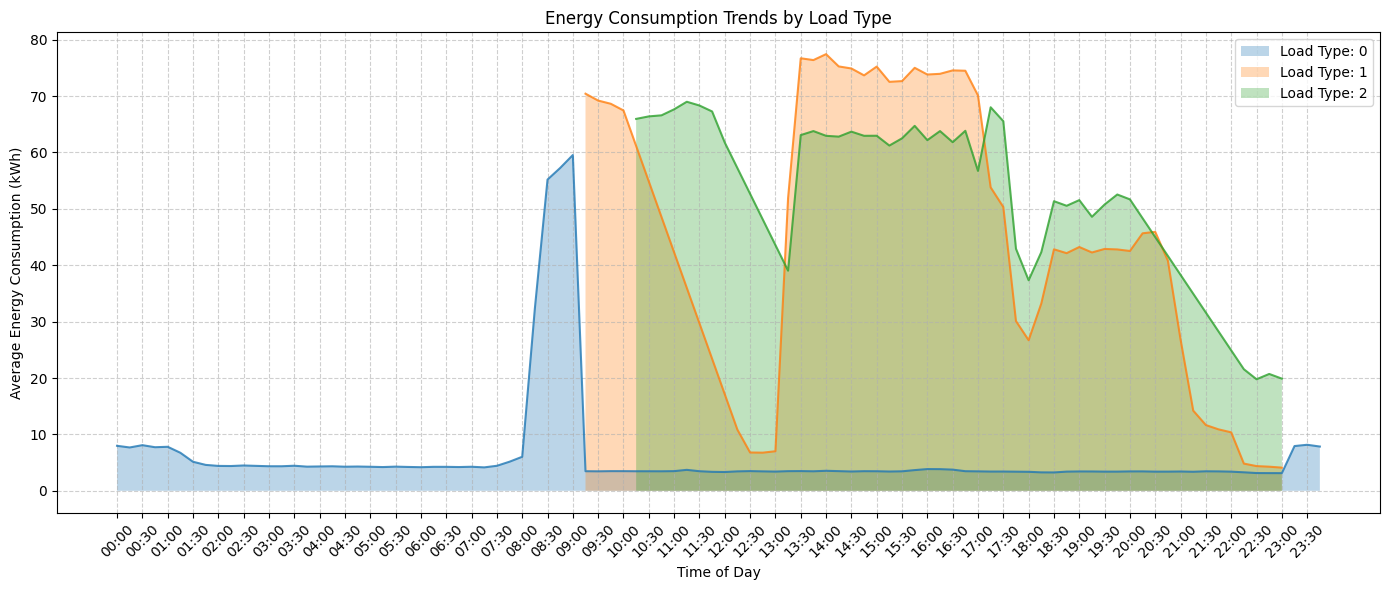

In [17]:
def plot_energy_trend_by_load():
    # Aggregate energy usage by NSM and Load_Type (mean or sum)
    load_data = data.groupby(['NSM', 'Load_Type'], as_index=False)['Usage_kWh'].mean()  # Use .sum() for total usage

    # Convert NSM to time format (hh:mm)
    load_data['Time'] = pd.to_datetime(load_data['NSM'], unit='s').dt.strftime('%H:%M')

    # Get unique Load Types
    unique_loads = load_data['Load_Type'].unique()

    # Plot
    plt.figure(figsize=(14, 6))

    # Loop through each Load Type and plot its trend
    for load in unique_loads:
        subset = load_data[load_data['Load_Type'] == load]
        plt.fill_between(subset['NSM'], subset['Usage_kWh'], alpha=0.3, label=f'Load Type: {load}')
        plt.plot(subset['NSM'], subset['Usage_kWh'], alpha=0.8)

    # Set axis labels and title
    plt.title('Energy Consumption Trends by Load Type')
    plt.xlabel('Time of Day')
    plt.ylabel('Average Energy Consumption (kWh)')

    # Adjust x-axis ticks to show every 30 minutes
    tick_interval = 1800  # 30 minutes in seconds
    tick_positions = list(range(0, 86400, tick_interval))  # From 00:00 to 23:30
    tick_labels = [pd.to_datetime(t, unit='s').strftime('%H:%M') for t in tick_positions]

    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)
    plt.legend()
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Call the function to plot energy trends by Load Type
plot_energy_trend_by_load()

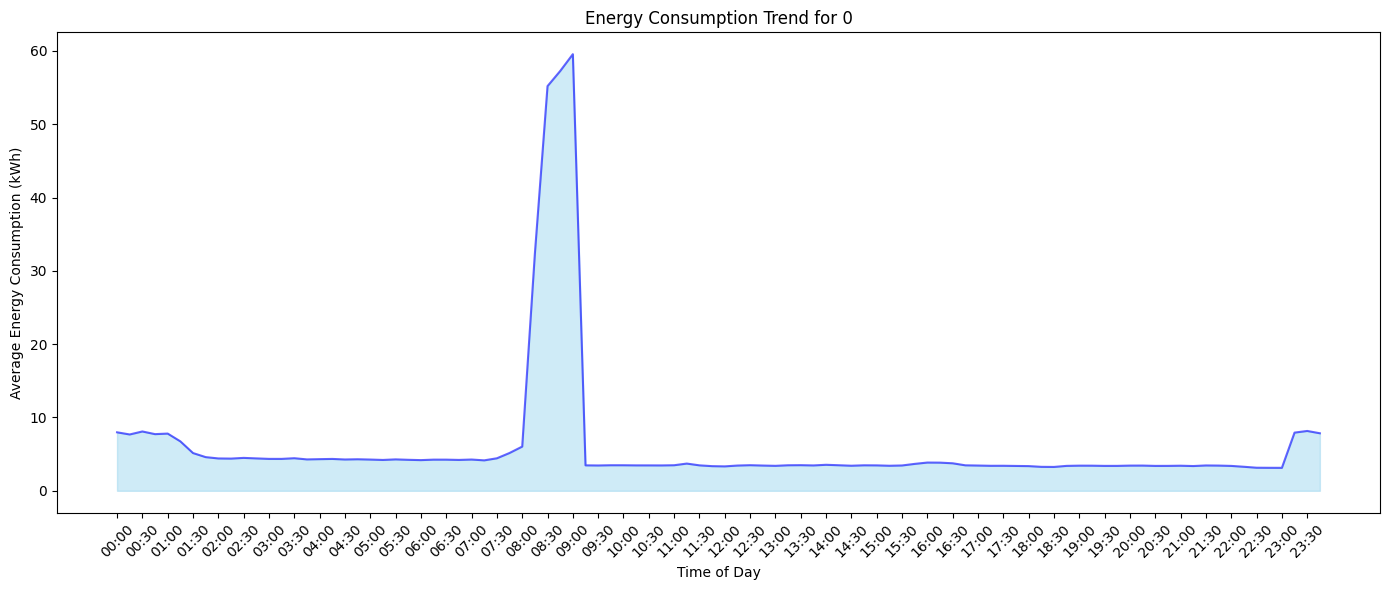

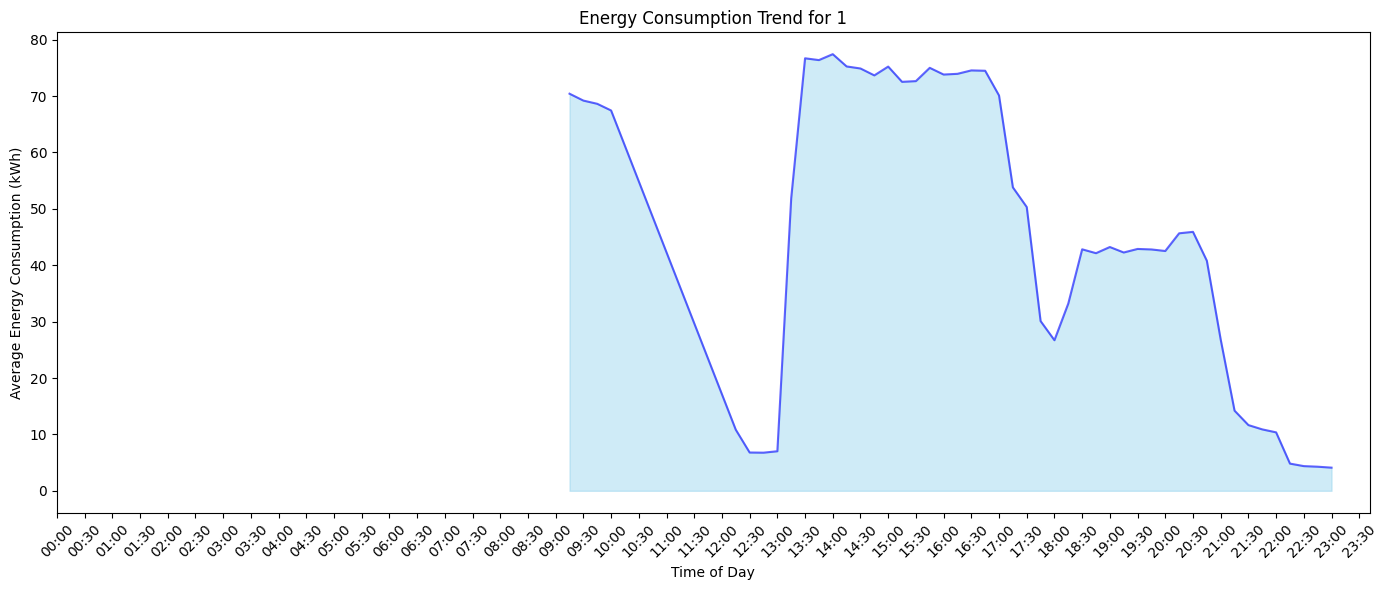

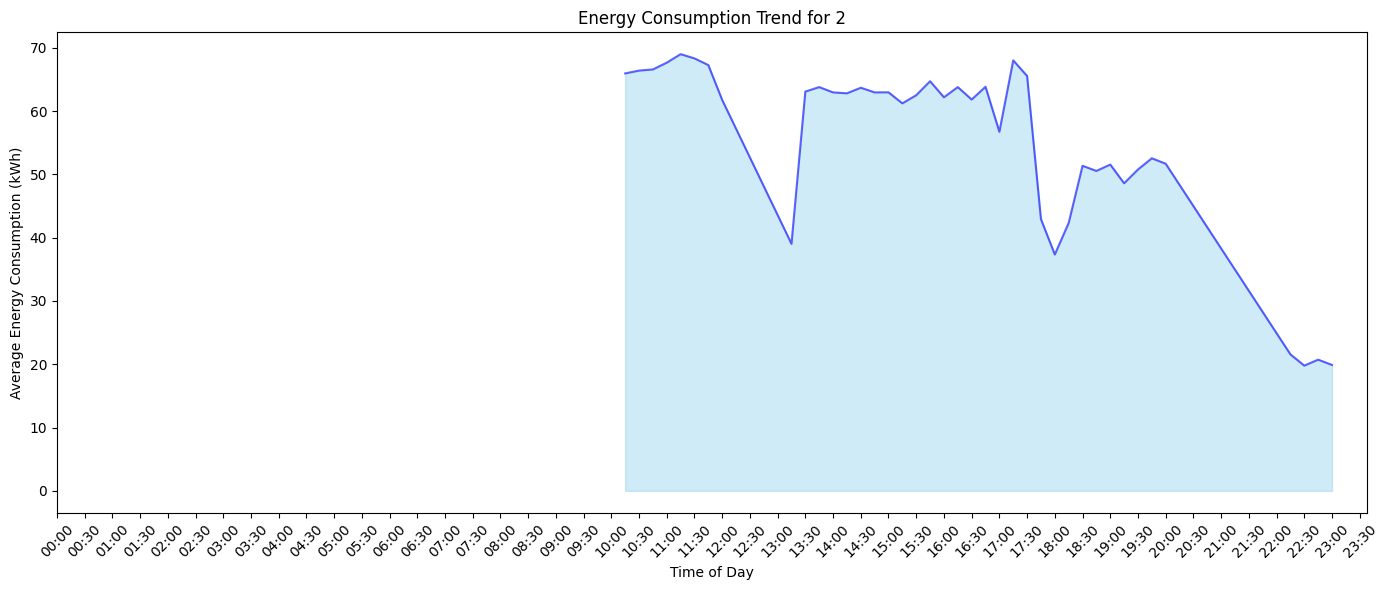

In [18]:
def plot_energy_trend_for_load(load_type):
    # Filter data for the selected Load Type
    load_data = data[data['Load_Type'] == load_type]

    # Aggregate energy usage by NSM (mean or sum)
    load_data = load_data.groupby('NSM', as_index=False)['Usage_kWh'].mean()  # Use .sum() for total usage

    # Convert NSM to time format (hh:mm)
    load_data['Time'] = pd.to_datetime(load_data['NSM'], unit='s').dt.strftime('%H:%M')

    # Plotting the Area Graph
    plt.figure(figsize=(14, 6))
    plt.fill_between(load_data['NSM'], load_data['Usage_kWh'], color='skyblue', alpha=0.4)
    plt.plot(load_data['NSM'], load_data['Usage_kWh'], color='b', alpha=0.6)

    # Set axis labels and title
    plt.title(f'Energy Consumption Trend for {load_type}')
    plt.xlabel('Time of Day')
    plt.ylabel('Average Energy Consumption (kWh)')

    # Adjust x-axis ticks to show every 30 minutes
    tick_interval = 1800  # 30 minutes in seconds
    tick_positions = list(range(0, 86400, tick_interval))  # From 00:00 to 23:30
    tick_labels = [pd.to_datetime(t, unit='s').strftime('%H:%M') for t in tick_positions]

    plt.xticks(ticks=tick_positions, labels=tick_labels, rotation=45)
    plt.grid(False)
    plt.tight_layout()
    plt.show()

# Example usage: Call the function with a specific Load Type
plot_energy_trend_for_load(0)
plot_energy_trend_for_load(1)
plot_energy_trend_for_load(2)

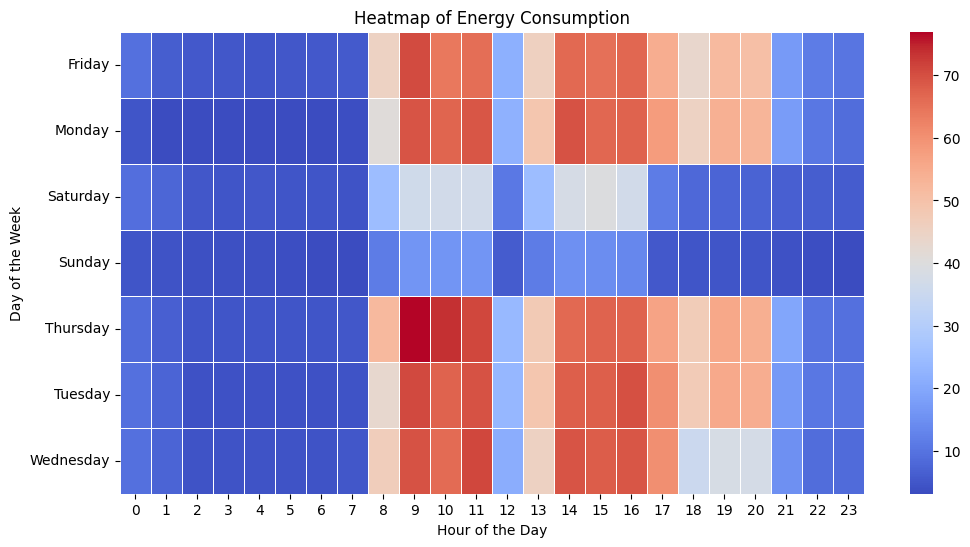

In [19]:


def plot_heatmap():
    # Convert NSM (seconds from midnight) to hourly bins
    data['Hour'] = data['NSM'] // 3600  # Convert seconds to hours

    # Pivot table for heatmap
    heatmap_data = data.pivot_table(values='Usage_kWh', index='Day_Of_Week', columns='Hour', aggfunc='mean')

    # Plot
    plt.figure(figsize=(12, 6))
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, linewidths=0.4)
    
    plt.title('Heatmap of Energy Consumption')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Day of the Week')
    plt.show()

plot_heatmap()


In [20]:
cols = data.columns.tolist()
print(cols)

['Date', 'Year', 'Month', 'time', 'WeekStatus', 'Day_Of_Week', 'NSM', 'Load_Type', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh', 'Lagging_Current_Power_Factor', 'Leading_Current_Power_Factor', 'CO2(tCO2)', 'Usage_kWh', 'Hour']


In [21]:
data.replace([np.inf, -np.inf], np.nan, inplace=True)
data.fillna(data.max(numeric_only=True), inplace=True)  # Replace NaN (inf) with max
data.fillna(data.min(numeric_only=True), inplace=True) 
data.isnull().sum()

Date                                    0
Year                                    0
Month                                   0
time                                    0
WeekStatus                              0
Day_Of_Week                             0
NSM                                     0
Load_Type                               0
Lagging_Current_Reactive.Power_kVarh    0
Leading_Current_Reactive_Power_kVarh    0
Lagging_Current_Power_Factor            0
Leading_Current_Power_Factor            0
CO2(tCO2)                               0
Usage_kWh                               0
Hour                                    0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


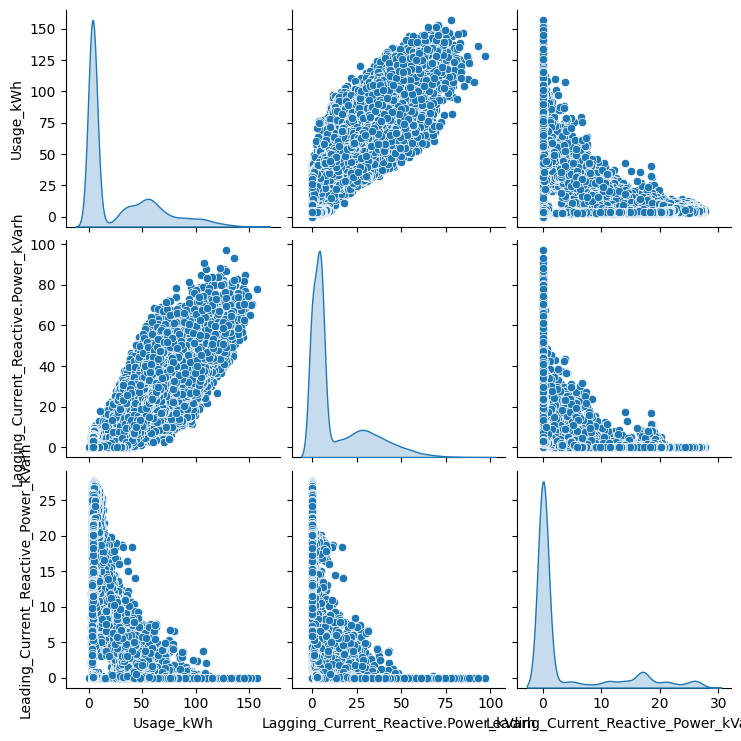

In [22]:
sns.pairplot(data[['Usage_kWh', 'Lagging_Current_Reactive.Power_kVarh', 'Leading_Current_Reactive_Power_kVarh']], diag_kind='kde')
plt.show()



/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


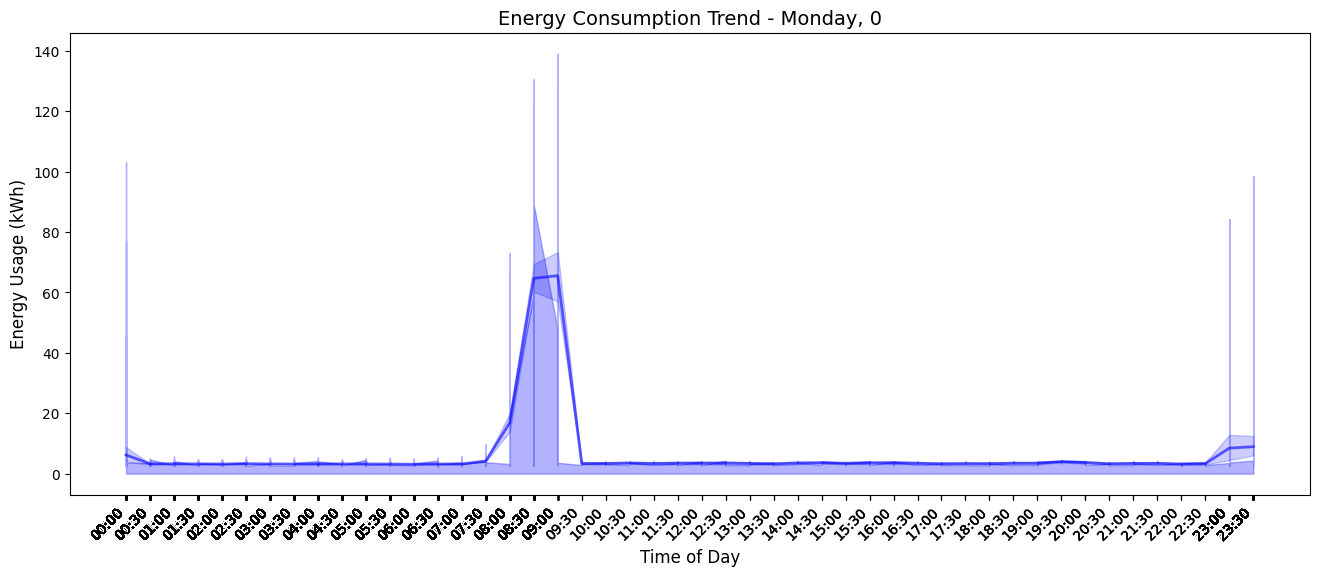

In [23]:
def plot_energy_usage(data, selected_day, selected_load):
    
    # Filter the data based on user selection
    filtered_data = data[(data["Day_Of_Week"] == selected_day) & (data["Load_Type"] == selected_load)]
    
    # Sort by time (NSM)
    filtered_data = filtered_data.sort_values(by="NSM")

    # Convert NSM to time format (HH:MM)
    filtered_data["Time"] = (filtered_data["NSM"] // 1800) * 1800  # Round to nearest 30 minutes
    filtered_data["Time"] = pd.to_datetime(filtered_data["Time"], unit="s").dt.strftime("%H:%M")

    # Plot
    plt.figure(figsize=(16, 6))
    sns.lineplot(data=filtered_data, x="Time", y="Usage_kWh", color="blue", alpha=0.6, linewidth=2)
    plt.fill_between(filtered_data["Time"], filtered_data["Usage_kWh"], alpha=0.3, color="blue")  # Area fill
    
    # Reduce number of x-axis labels (showing only 30-minute intervals)
    plt.xticks(ticks=filtered_data["Time"][::2], rotation=45, ha='right', fontsize=10)

    plt.xlabel("Time of Day", fontsize=12)
    plt.ylabel("Energy Usage (kWh)", fontsize=12)
    plt.title(f"Energy Consumption Trend - {selected_day}, {selected_load}", fontsize=14)
    
    plt.grid(False)
    plt.show()

plot_energy_usage(data, "Monday", 0)


In [34]:
data.to_csv("cleaned_data1.csv", index=False) 
data1 = pd.read_csv('/kaggle/working/cleaned_data1.csv')
data1.head(10)

,Date,Year,Month,time,WeekStatus,Day_Of_Week,NSM,Load_Type,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,Leading_Current_Power_Factor,CO2(tCO2),Usage_kWh,Hour
0,2018-01-01,2018,1,00:15,1,Monday,900,0,2.95,0.0,73.21,100.0,0.0,3.17,0
1,2018-01-01,2018,1,00:30,1,Monday,1800,0,4.46,0.0,66.77,100.0,0.0,4.00,0
2,2018-01-01,2018,1,00:45,1,Monday,2700,0,3.28,0.0,70.28,100.0,0.0,3.24,0
3,2018-01-01,2018,1,01:00,1,Monday,3600,0,3.56,0.0,68.09,100.0,0.0,3.31,1
4,2018-01-01,2018,1,01:15,1,Monday,4500,0,4.50,0.0,64.72,100.0,0.0,3.82,1
5,2018-01-01,2018,1,01:30,1,Monday,5400,0,3.56,0.0,67.76,100.0,0.0,3.28,1
6,2018-01-01,2018,1,01:45,1,Monday,6300,0,4.14,0.0,65.62,100.0,0.0,3.60,1
7,2018-01-01,2018,1,02:00,1,Monday,7200,0,4.28,0.0,64.37,100.0,0.0,3.60,2
8,2018-01-01,2018,1,02:15,1,Monday,8100,0,3.64,0.0,66.94,100.0,0.0,3.28,2
9,2018-01-01,2018,1,02:30,1,Monday,9000,0,4.72,0.0,62.51,100.0,0.0,3.78,2


In [64]:
data1['Date'] = pd.to_datetime(data1['Date'])

# Extract the day of the month
data1['Day'] = data1['Date'].dt.day

data_e = pd.get_dummies(data, columns=['Day_Of_Week'], drop_first=True, dtype=int)

data_e['Day_Of_Week_Monday'] = data_e['Day_Of_Week_Monday'].replace({True: 1, False: 0}).infer_objects()
data_e['Day_Of_Week_Saturday'] = data_e['Day_Of_Week_Saturday'].replace({True: 1, False: 0}).infer_objects()
data_e['Day_Of_Week_Sunday'] = data_e['Day_Of_Week_Sunday'].replace({True: 1, False: 0}).infer_objects()
data_e['Day_Of_Week_Thursday'] = data_e['Day_Of_Week_Thursday'].replace({True: 1, False: 0}).infer_objects()
data_e['Day_Of_Week_Tuesday'] = data_e['Day_Of_Week_Tuesday'].replace({True: 1, False: 0}).infer_objects()
data_e['Day_Of_Week_Wednesday'] = data_e['Day_Of_Week_Wednesday'].replace({True: 1, False: 0}).infer_objects()


data_e['Date'] = pd.to_datetime(data_e['Date'])

# Extract the day of the month
data_e['Day'] = data_e['Date'].dt.day

data_e

,Date,Year,Month,time,WeekStatus,NSM,Load_Type,Lagging_Current_Reactive.Power_kVarh,Leading_Current_Reactive_Power_kVarh,Lagging_Current_Power_Factor,...,CO2(tCO2),Usage_kWh,Hour,Day_Of_Week_Monday,Day_Of_Week_Saturday,Day_Of_Week_Sunday,Day_Of_Week_Thursday,Day_Of_Week_Tuesday,Day_Of_Week_Wednesday,Day
0,2018-01-01,2018,1,00:15,1,900,0,2.95,0.00,73.21,...,0.0,3.17,0,1,0,0,0,0,0,1
1,2018-01-01,2018,1,00:30,1,1800,0,4.46,0.00,66.77,...,0.0,4.00,0,1,0,0,0,0,0,1
2,2018-01-01,2018,1,00:45,1,2700,0,3.28,0.00,70.28,...,0.0,3.24,0,1,0,0,0,0,0,1
3,2018-01-01,2018,1,01:00,1,3600,0,3.56,0.00,68.09,...,0.0,3.31,1,1,0,0,0,0,0,1
4,2018-01-01,2018,1,01:15,1,4500,0,4.50,0.00,64.72,...,0.0,3.82,1,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35036,2018-12-31,2018,12,23:15,1,83700,0,3.74,0.00,70.71,...,0.0,3.74,23,1,0,0,0,0,0,31
35037,2018-12-31,2018,12,23:30,1,84600,0,3.17,0.07,76.62,...,0.0,3.78,23,1,0,0,0,0,0,31
35038,2018-12-31,2018,12,23:45,1,85500,0,3.06,0.11,77.72,...,0.0,3.78,23,1,0,0,0,0,0,31
35039,2018-12-31,2018,12,00:00,1,0,0,3.02,0.07,77.22,...,0.0,3.67,0,1,0,0,0,0,0,31


In [1]:
data_e.to_csv("cleaned_data2.csv", index=False) 


NameError: name 'data_e' is not defined